<a href="https://colab.research.google.com/github/Chinmaya54/CP_02_T16_MineCrafters/blob/Riya/Riya_DM_CP_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessiong and extracting instances having single author

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
# Load the CSV files
df1 = pd.read_csv('/content/drive/MyDrive/dataset.csv')   # dataset_csv
df2 = pd.read_csv('/content/drive/MyDrive/authors.csv')   # authors_csv
#df3 = pd.read_csv('/content/drive/MyDrive/categories.csv')  # categories_csv


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

In [ ]:
df1.head()

,authors,bestsellers-rank,categories,description,dimension-x,dimension-y,dimension-z,edition,edition-statement,for-ages,format,id,illustrations-note,image-checksum,image-path,image-url,imprint,index-date,isbn10,isbn13,lang,publication-date,publication-place,rating-avg,rating-count,title,url,weight
0,[1],49848.0,"[214, 220, 237, 2646, 2647, 2659, 2660, 2679]",SOLDIER FIVE is an elite soldier's explosive m...,129.0,198.0,20.0,NaN,NaN,NaN,1.0,9781840189070,NaN,97c8e71f2ec114b34f243074d2091077,full/c/5/2/c529152ea1246c0cb17d6574d302eae6d2e...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Mainstream Publishing,NaN,184018907X,9781840189070,en,2004-10-14 00:00:00,NaN,4.03,292.0,Soldier Five : The Real Truth About The Bravo ...,/Soldier-Five-Mike-Coburn/9781840189070,224.00
1,"[2, 3]",115215.0,"[235, 3386]",John Moran and Carl Williams were the two bigg...,127.0,203.2,25.4,NaN,NaN,NaN,1.0,9781844547371,NaN,1dc4e79575474ac775cdfe9840bdfb94,full/5/9/8/598ae8f736c99bc423352887d406d2b2f94...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,NaN,NaN,184454737X,9781844547371,en,2009-03-13 00:00:00,NaN,3.60,335.0,Underbelly : The Gangland War,/Underbelly-Andrew-Rule/9781844547371,285.76
2,[4],11732.0,"[358, 2630, 360, 2632]",Sir Phillip knew that Eloise Bridgerton was a ...,150.0,224.0,28.0,New edition,NaN,NaN,1.0,9788416327867,NaN,3be3fd4fb2fceeb1eb58c3e73242ebb9,full/1/a/2/1a24ac04d4e0a01c8bb531481244b543167...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,NaN,NaN,8416327866,9788416327867,es,2020-04-30 00:00:00,NaN,3.88,37211.0,"A Sir Phillip, Con Amor",/Sir-Phillip-Con-Amor-Julia-Quinn/9788416327867,386.00
3,"[5, 6, 7, 8]",114379.0,"[377, 2978, 2980]",The Third Book of General Ignorance gathers t...,153.0,234.0,24.0,NaN,Export - Airside ed,NaN,1.0,9780571308996,NaN,bc593914f06e1021be9977114ea2a28f,full/1/a/f/1af9cad94dfe897b4423993c78b137bee40...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,NaN,NaN,571308996,9780571308996,en,2015-10-01 00:00:00,NaN,4.17,384.0,QI: The Third Book of General Ignorance,/QI-Third-Book-General-Ignorance-John-Lloyd/97...,436.00
4,[9],98413.0,"[2813, 2980]",The Try Guys deliver their first book-an inspi...,191.0,240.0,29.0,NaN,NaN,NaN,2.0,9780008352516,NaN,39c0422c00be90fb9258dd6df9068b1e,full/e/e/a/eea0ff6b6f1882d1862c711a2008e3c35d3...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,HarperCollins Publishers Ltd,NaN,8352518,9780008352516,en,2019-06-18 00:00:00,NaN,3.90,5095.0,The Hidden Power of F*cking Up,/Hidden-Power-F-cking-Up-Try-Guys/9780008352516,980.00


In [ ]:
df1.isnull().sum()

authors                     0
bestsellers-rank       466842
categories                  0
description             80087
dimension-x             48227
dimension-y             93531
dimension-z             48227
edition                926569
edition-statement      747261
for-ages              1033390
format                   6622
id                          0
illustrations-note     752907
image-checksum             27
image-path                 27
image-url                  27
imprint                830049
index-date            1109383
isbn10                      0
isbn13                      0
lang                    60407
publication-date         2603
publication-place     1109383
rating-avg             440130
rating-count           440130
title                       0
url                         0
weight                  87173
dtype: int64

In [ ]:
df1.dtypes

authors                object
bestsellers-rank      float64
categories             object
description            object
dimension-x           float64
dimension-y           float64
dimension-z           float64
edition                object
edition-statement      object
for-ages               object
format                float64
id                      int64
illustrations-note     object
image-checksum         object
image-path             object
image-url              object
imprint                object
index-date            float64
isbn10                 object
isbn13                  int64
lang                   object
publication-date       object
publication-place     float64
rating-avg            float64
rating-count          float64
title                  object
url                    object
weight                float64
dtype: object

In [ ]:
df1.nunique()

authors                564646
bestsellers-rank       531931
categories             425186
description            841392
dimension-x              1797
dimension-y              2054
dimension-z              1312
edition                   104
edition-statement       11293
for-ages                   55
format                     48
id                    1109383
illustrations-note      98664
image-checksum        1004723
image-path            1109356
image-url             1109356
imprint                  5782
index-date                  0
isbn10                1109382
isbn13                1109383
lang                      162
publication-date        14976
publication-place           0
rating-avg                323
rating-count            27912
title                  957559
url                   1109383
weight                   7043
dtype: int64

In [ ]:
df2.head()

,author_id,author_name
0,9561,NaN
1,451324,# House Press
2,454250,# Petal Press
3,249724,#GARCIA MIGUELE
4,287710,#Worldlcass Media


In [ ]:
df2.dtypes

author_id       int64
author_name    object
dtype: object

In [ ]:
df1['authors'] = df1['authors'].str.replace(r'\[|\]', '', regex=True)

df1['categories'] = df1['categories'].str.replace(r'\[|\]', '', regex=True)


In [ ]:
df2['author_id'] = df2['author_id'].astype(str)
merged_df = df1.merge(df2, left_on='authors', right_on='author_id', how='left')

# df3['category_id'] = df3['category_id'].astype(str)
# merged_df = merged_df.merge(df3, left_on='categories', right_on='category_id', how='left')


In [ ]:
author_1 = merged_df[merged_df['authors'].str.count(',') == 0]

In [ ]:
author_1.head()

,authors,bestsellers-rank,categories,description,dimension-x,dimension-y,dimension-z,edition,edition-statement,for-ages,format,id,illustrations-note,image-checksum,image-path,image-url,imprint,index-date,isbn10,isbn13,lang,publication-date,publication-place,rating-avg,rating-count,title,url,weight,author_id,author_name
0,1,49848.0,"214, 220, 237, 2646, 2647, 2659, 2660, 2679",SOLDIER FIVE is an elite soldier's explosive m...,129.0,198.0,20.00,NaN,NaN,NaN,1.0,9781840189070,NaN,97c8e71f2ec114b34f243074d2091077,full/c/5/2/c529152ea1246c0cb17d6574d302eae6d2e...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Mainstream Publishing,NaN,184018907X,9781840189070,en,2004-10-14 00:00:00,NaN,4.03,292.0,Soldier Five : The Real Truth About The Bravo ...,/Soldier-Five-Mike-Coburn/9781840189070,224.00,1,Mike Coburn
2,4,11732.0,"358, 2630, 360, 2632",Sir Phillip knew that Eloise Bridgerton was a ...,150.0,224.0,28.00,New edition,NaN,NaN,1.0,9788416327867,NaN,3be3fd4fb2fceeb1eb58c3e73242ebb9,full/1/a/2/1a24ac04d4e0a01c8bb531481244b543167...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,NaN,NaN,8416327866,9788416327867,es,2020-04-30 00:00:00,NaN,3.88,37211.0,"A Sir Phillip, Con Amor",/Sir-Phillip-Con-Amor-Julia-Quinn/9788416327867,386.00,4,Julia Quinn
4,9,98413.0,"2813, 2980",The Try Guys deliver their first book-an inspi...,191.0,240.0,29.00,NaN,NaN,NaN,2.0,9780008352516,NaN,39c0422c00be90fb9258dd6df9068b1e,full/e/e/a/eea0ff6b6f1882d1862c711a2008e3c35d3...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,HarperCollins Publishers Ltd,NaN,8352518,9780008352516,en,2019-06-18 00:00:00,NaN,3.90,5095.0,The Hidden Power of F*cking Up,/Hidden-Power-F-cking-Up-Try-Guys/9780008352516,980.00,9,The Try Guys
8,14,7004.0,"3223, 700, 1521, 2820",For the millions of Americans who want spiritu...,140.0,213.0,15.00,NaN,Reprint,NaN,1.0,9781451636024,NaN,8242901f9c8358e80b64f16a9b76df0b,full/f/4/e/f4e5b422024491be842709726380c7a4c1c...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,NaN,NaN,1451636024,9781451636024,en,2015-06-16 00:00:00,NaN,3.92,33806.0,Waking Up : A Guide to Spirituality Without Re...,/Waking-Up-Sam-Harris/9781451636024,181.00,14,Sam Harris
9,15,66137.0,"37, 46, 2784, 2942, 2980, 2912, 3385","Part of the Art of Coloring series, which has ...",193.0,272.0,15.24,NaN,NaN,NaN,1.0,9781484788899,"1 Illustrations, unspecified",9f620cba34acf4ae6c717d0dd62c3aa4,full/8/0/0/800b21ffb4eddce9c7753889798e2affad0...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,NaN,NaN,1484788893,9781484788899,en,2017-05-04 00:00:00,NaN,4.20,5.0,Art Of Coloring: Muppets,/Art-Coloring-Muppets-Disney-Book-Group/978148...,476.27,15,Disney Book Group


In [ ]:
author_1.shape

(771607, 30)

In [ ]:
author_1.isnull().sum()

authors                    0
bestsellers-rank      330530
categories                 0
description            61452
dimension-x            35343
dimension-y            63787
dimension-z            35343
edition               694145
edition-statement     575274
for-ages              721103
format                  4932
id                         0
illustrations-note    530092
image-checksum            21
image-path                21
image-url                 21
imprint               583294
index-date            771607
isbn10                     0
isbn13                     0
lang                   44054
publication-date        2248
publication-place     771607
rating-avg            332974
rating-count          332974
title                      0
url                        0
weight                 56407
author_id              17495
author_name            17681
dtype: int64

In [ ]:
author_1['author_id'] = author_1['author_id'].astype(float)
author_1['author_id'].dtypes

<ipython-input-17-1e2c38fa7ed7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  author_1['author_id'] = author_1['author_id'].astype(float)


dtype('float64')

In [ ]:
# Checking null value percentage
percent_missing = author_1.isnull().sum() * 100 / len(author_1)
missing_value_df = pd.DataFrame({'missing_percentage': percent_missing})
missing_value_df.sort_values('missing_percentage',ascending=False, inplace=True)
missing_value_df.head(28)

,missing_percentage
index-date,100.000000
publication-place,100.000000
for-ages,93.454699
edition,89.960952
imprint,75.594700
edition-statement,74.555311
illustrations-note,68.699740
rating-count,43.153315
rating-avg,43.153315
bestsellers-rank,42.836574


In [ ]:
# Drop columns having more than 80% missing values
author_1.drop(['index-date',	'publication-place', 'for-ages', 'edition'], axis=1, inplace=True)

<ipython-input-19-b39169a92336>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  author_1.drop(['index-date',	'publication-place', 'for-ages', 'edition'], axis=1, inplace=True)


In [ ]:
# Dropping null values less than 1%
author_1.dropna(subset=['format','publication-date'],inplace=True)

<ipython-input-20-e010c2e5ed4b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  author_1.dropna(subset=['format','publication-date'],inplace=True)


In [ ]:
# Select columns with missing values exceeding 30% but less than 95%
impute_cols = percent_missing[(percent_missing > 1) & (percent_missing < 80)].index
print(impute_cols)

Index(['bestsellers-rank', 'description', 'dimension-x', 'dimension-y',
       'dimension-z', 'edition-statement', 'illustrations-note', 'imprint',
       'lang', 'rating-avg', 'rating-count', 'weight', 'author_id',
       'author_name'],
      dtype='object')


In [ ]:
author_1[impute_cols].dtypes

bestsellers-rank      float64
description            object
dimension-x           float64
dimension-y           float64
dimension-z           float64
edition-statement      object
illustrations-note     object
imprint                object
lang                   object
rating-avg            float64
rating-count          float64
weight                float64
author_id             float64
author_name            object
dtype: object

In [ ]:
# Separate numeric and categorical columns from impute_cols
numeric_cols = author_1[impute_cols].select_dtypes(include=['float64', 'int64']).columns
cat_cols = author_1[impute_cols].select_dtypes(include=['object']).columns

In [ ]:
numeric_cols

Index(['bestsellers-rank', 'dimension-x', 'dimension-y', 'dimension-z',
       'rating-avg', 'rating-count', 'weight', 'author_id'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cat_cols

Index(['description', 'edition-statement', 'illustrations-note', 'imprint',
       'lang', 'author_name'],
      dtype='object')

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
author_1['imprint'].unique()

array(['Mainstream Publishing', nan, 'HarperCollins Publishers Ltd', ...,
       'Paidotribo S L', 'Modus Operandi', 'Highdown'], dtype=object)

In [ ]:
author_1['imprint'].nunique()

4966

In [ ]:
author_1['lang'].nunique()

146

In [ ]:
# imputeute missing values for numeric columns with mean
num_imputer = SimpleImputer(strategy='mean')
author_1[numeric_cols] = num_imputer.fit_transform(author_1[numeric_cols])

# imputeute missing values for categorical columns with most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
author_1[cat_cols] = cat_imputer.fit_transform(author_1[cat_cols])
author_1.dropna(subset=['image-checksum','image-path','image-url'],inplace=True)
# Check if any missing values remain
author_1.isnull().sum()

# No null values are present

<ipython-input-31-4aa362e1ab7d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  author_1[numeric_cols] = num_imputer.fit_transform(author_1[numeric_cols])
<ipython-input-31-4aa362e1ab7d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  author_1[cat_cols] = cat_imputer.fit_transform(author_1[cat_cols])
<ipython-input-31-4aa362e1ab7d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

authors               0
bestsellers-rank      0
categories            0
description           0
dimension-x           0
dimension-y           0
dimension-z           0
edition-statement     0
format                0
id                    0
illustrations-note    0
image-checksum        0
image-path            0
image-url             0
imprint               0
isbn10                0
isbn13                0
lang                  0
publication-date      0
rating-avg            0
rating-count          0
title                 0
url                   0
weight                0
author_id             0
author_name           0
dtype: int64

In [ ]:
# Changing datatype of rating-avg and bestsellers-rank
change_type = {'rating-avg': int, 'bestsellers-rank': int,'format': int,'rating-count': int}
author_1 = author_1.astype(change_type)

In [ ]:
# Extract count of values having X from isbn10
count_X_values = author_1['isbn10'].str.count('X').sum()
print(f"Count of values with 'X' in the column 'isbn10': {count_X_values}")

Count of values with 'X' in the column 'isbn10': 69000


In [ ]:
# dropping isbn10 since it has X in values
author_1.drop(['isbn10'],axis=1,inplace=True)

In [ ]:
# Changing publication date to proper date format
author_1['publication-date'] = pd.to_datetime(author_1['publication-date'])

In [ ]:
author_1.shape

(764668, 25)

In [ ]:
# Dropping Unnecessary columns
author_1.drop(['edition-statement', 'illustrations-note','image-checksum','image-path','image-url','url'],axis=1, inplace= True)

In [ ]:
author_1.drop(['description'], axis=1, inplace=True)

In [ ]:
author_1.drop(['id','publication-date','title'], axis=1, inplace=True)

In [ ]:
author_1.dtypes

authors              object
bestsellers-rank      int64
categories           object
dimension-x         float64
dimension-y         float64
dimension-z         float64
format                int64
imprint              object
isbn13                int64
lang                 object
rating-avg            int64
rating-count          int64
weight              float64
author_id           float64
author_name          object
dtype: object

In [ ]:
author_1.shape

(764668, 15)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Fitting and transforming the 'imprint' column
author_1['imprint'] = le.fit_transform(author_1['imprint'].astype(str))
# Fitting and transforming the 'lang' column
author_1['lang'] = le.fit_transform(author_1['lang'].astype(str))


In [ ]:
author_1.dtypes

authors              object
bestsellers-rank      int64
categories           object
dimension-x         float64
dimension-y         float64
dimension-z         float64
format                int64
imprint               int64
isbn13                int64
lang                  int64
rating-avg            int64
rating-count          int64
weight              float64
author_id           float64
author_name          object
dtype: object

#Model

<ipython-input-44-94840b7e6fdc>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = author_1.corr()


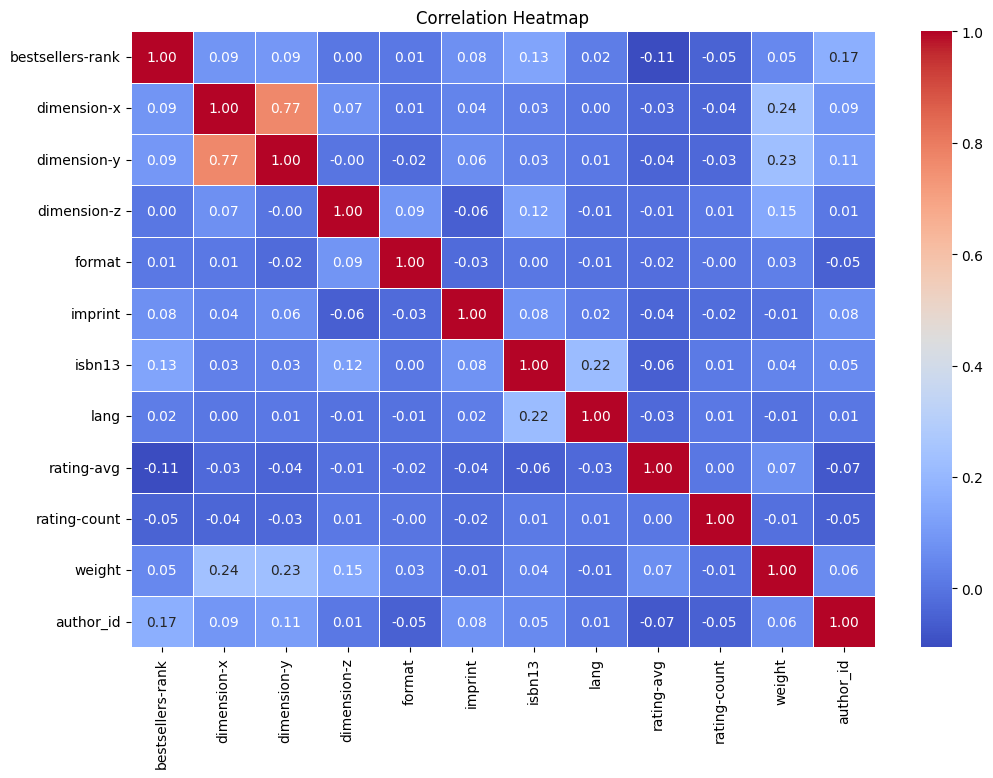

In [ ]:
# Feature Selection using Correlation Analysis
import seaborn as sns
import matplotlib.pyplot as plt
# Correlation matrix
correlation_matrix = author_1.corr()
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Selected features
predictors = [ 'bestsellers-rank','imprint', 'lang',
       'dimension-x', 'dimension-y', 'dimension-z',
          'format', 'isbn13', 'weight']

In [ ]:
# Data Preparation
X = author_1[predictors]
y = author_1['rating-avg']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Train-test split
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)


**Logistic Regression:**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create and fit the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Predict on validation set
y_val_pred_logistic = logistic_model.predict(X_val)

# Evaluate the Logistic Regression model
accuracy_logistic = accuracy_score(y_val, y_val_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_val, y_val_pred_logistic)

print("Logistic Regression - Validation Accuracy:", accuracy_logistic)
print("Logistic Regression - Confusion Matrix:\n", conf_matrix_logistic)


Logistic Regression - Validation Accuracy: 0.6685353095030514
Logistic Regression - Confusion Matrix:
 [[    0     0   321     0     0]
 [    0     0  1530     0     0]
 [    0     0 76681     0     0]
 [    0     0 31862     0     0]
 [    0     0  4306     0     0]]


In [ ]:
# Predict on training set
y_train_pred_logistic = logistic_model.predict(X_train)

# Predict on test set
y_test_pred_logistic = logistic_model.predict(X_test)

accuracy_logistic_val = accuracy_score(y_val, y_val_pred_logistic)
accuracy_logistic_train = accuracy_score(y_train, y_train_pred_logistic)
accuracy_logistic_test = accuracy_score(y_test, y_test_pred_logistic)

# Print the results
print("Logistic Regression - Validation Accuracy:", accuracy_logistic_val)
print("Logistic Regression - Training Accuracy:", accuracy_logistic_train)
print("Logistic Regression - Test Accuracy:", accuracy_logistic_test)



Logistic Regression - Validation Accuracy: 0.6685353095030514
Logistic Regression - Training Accuracy: 0.6687895947256229
Logistic Regression - Test Accuracy: 0.6696192709740979


**Random Forest:**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_val_pred_rf = random_forest_classifier.predict(X_val)
accuracy_rf_val = accuracy_score(y_val, y_val_pred_rf)
y_test_pred_rf = random_forest_classifier.predict(X_test)
accuracy_rf_test = accuracy_score(y_test, y_test_pred_rf)

# Print the results
print("Random Forest - Validation Accuracy:", accuracy_rf_val)
print("Random Forest - Test Accuracy:", accuracy_rf_test)


Random Forest - Validation Accuracy: 0.6994158674803836
Random Forest - Test Accuracy: 0.7032719854229693


**Decision Tree:**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create and fit the Decision Tree model for classification
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_val_pred_dt = decision_tree_classifier.predict(X_val)
y_train_pred_dt = decision_tree_classifier.predict(X_train)
y_test_pred_dt = decision_tree_classifier.predict(X_test)
accuracy_dt_val = accuracy_score(y_val, y_val_pred_dt)
accuracy_dt_train = accuracy_score(y_train, y_train_pred_dt)
accuracy_dt_test = accuracy_score(y_test, y_test_pred_dt)

# Print the results
print("Decision Tree - Validation Accuracy:", accuracy_dt_val)
print("Decision Tree - Training Accuracy:", accuracy_dt_train)
print("Decision Tree - Test Accuracy:", accuracy_dt_test)


Decision Tree - Validation Accuracy: 0.6312467306015693
Decision Tree - Training Accuracy: 0.9881946766753789
Decision Tree - Test Accuracy: 0.6370825014603185


**KNN Classifier**

In [65]:
from sklearn.neighbors import KNeighborsClassifier

# Create and fit the KNN classifier model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [68]:
# Predict on the validation set
y_val_pred_knn = knn_model.predict(X_val)

# Evaluate the KNN model on the validation set
accuracy_knn = accuracy_score(y_val, y_val_pred_knn)
conf_matrix_knn = confusion_matrix(y_val, y_val_pred_knn)

print("K-Nearest Neighbors - Validation Accuracy:", accuracy_knn)
print("K-Nearest Neighbors - Confusion Matrix:\n", conf_matrix_knn)


K-Nearest Neighbors - Validation Accuracy: 0.6891194420226678
K-Nearest Neighbors - Confusion Matrix:
 [[    0     1   286    32     2]
 [    1    25  1253   243     8]
 [   23   193 64925 11331   209]
 [    7    74 17657 14020   104]
 [    5    20  3389   820    72]]


In [69]:
#Predict on the training set
y_train_pred_knn = knn_model.predict(X_train)

# Predict on the test set
y_test_pred_knn = knn_model.predict(X_test)

accuracy_knn_val = accuracy_score(y_val, y_val_pred_knn)
accuracy_knn_train = accuracy_score(y_train, y_train_pred_knn)
accuracy_knn_test = accuracy_score(y_test, y_test_pred_knn)

# Print the results for KNN classifier
print("K-Nearest Neighbors - Validation Accuracy:", accuracy_knn_val)
print("K-Nearest Neighbors - Training Accuracy:", accuracy_knn_train)
print("K-Nearest Neighbors - Test Accuracy:", accuracy_knn_test)


K-Nearest Neighbors - Validation Accuracy: 0.6891194420226678
K-Nearest Neighbors - Training Accuracy: 0.77422856256784
K-Nearest Neighbors - Test Accuracy: 0.6908047881012371


**Hyperparameter Tuning:**

In [57]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import RandomForestClassifier
# import numpy as np

# # Define hyperparameter distributions for Random Forest
# param_dist = {
#     'n_estimators': np.arange(100, 500, 10),  # Range of n_estimators
#     'max_depth': list(np.arange(10, 101, 10)),  # Range of max_depth
#     'min_samples_split': [2, 5, 10],  # Values for min_samples_split
# }

# # Create the Randomized Search object
# random_search = RandomizedSearchCV(
#     estimator=RandomForestClassifier(random_state=42),
#     param_distributions=param_dist,
#     n_iter=10,  # Number of random combinations to try
#     cv=5,
#     random_state=42
# )
# random_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_params = random_search.best_params_

# # Print the best hyperparameters
# print("Best Hyperparameters:", best_params)


**Regularization (for Logistic Regression):**

In [58]:
logistic_model_regularized = LogisticRegression(penalty='l2', C=1.0)
logistic_model_regularized.fit(X_train, y_train)


LogisticRegression()

In [59]:
# Predict on the test set
y_test_pred_logistic_reg = logistic_model_regularized.predict(X_test)

# Evaluate the model on the test set
accuracy_test_logistic_reg = accuracy_score(y_test, y_test_pred_logistic_reg)

print("Logistic Regression with L2 Regularization - Test Accuracy:", accuracy_test_logistic_reg)


Logistic Regression with L2 Regularization - Test Accuracy: 0.6696192709740979


**Regularization (for Random Forest):**

In [60]:
from sklearn.ensemble import RandomForestClassifier

# Regularized Random Forest for classification
random_forest_model_regularized = RandomForestClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', random_state=42)
random_forest_model_regularized.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [61]:
# Predict on the test set
y_test_pred_rf_reg = random_forest_model_regularized.predict(X_test)

# Evaluate the model on the test set
accuracy_test_rf_reg = accuracy_score(y_test, y_test_pred_rf_reg)

print("Random Forest with Regularization - Test Accuracy:", accuracy_test_rf_reg)


Random Forest with Regularization - Test Accuracy: 0.7096537955205273


**Regularization (for Decision Tree):**

In [62]:
from sklearn.tree import DecisionTreeClassifier

# Regularized Decision Tree for classification
decision_tree_model_regularized = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, max_features='sqrt', random_state=42)
decision_tree_model_regularized.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=10, random_state=42)

In [63]:
# Predict on the test set
y_test_pred_dt_reg = decision_tree_model_regularized.predict(X_test)

# Evaluate the model on the test set
accuracy_test_dt_reg = accuracy_score(y_test, y_test_pred_dt_reg)

print("Regularized Decision Tree - Test Accuracy:", accuracy_test_dt_reg)


Regularized Decision Tree - Test Accuracy: 0.6945623839373676


#Top 20 Authors

In [64]:
# Sort the DataFrame by bestsellers rank in ascending order
top_authors = author_1.sort_values(by='bestsellers-rank', ascending=True)

# Select the top 20 authors
top_20_authors = top_authors.head(20)

# Get the names of the top 20 authors
top_20_author_names = top_20_authors['author_name']

# Print the top 20 author names
print("Top 20 Author Names based on Bestsellers Rank:")
print(top_20_author_names)


Top 20 Author Names based on Bestsellers Rank:
96189               Brian Pennie
695733            John O'Donohue
95978      Morgan Harper Nichols
417696            William Gibson
573906             Sarah J. Maas
881532               Roisin Cure
417513                Kate Mosse
648666             Sarah J. Maas
235742            Michael Pollan
417396          Deborah Harkness
417229              Stephen King
353569               Q Hayashida
306689              Tomohito Oda
1049997            Jessica Brody
95281                 A. J. Finn
417449              Paulo Coelho
648721                 Eric Hill
95290                  Ira Levin
417391              J.K. Rowling
353853                 Junji Ito
Name: author_name, dtype: object


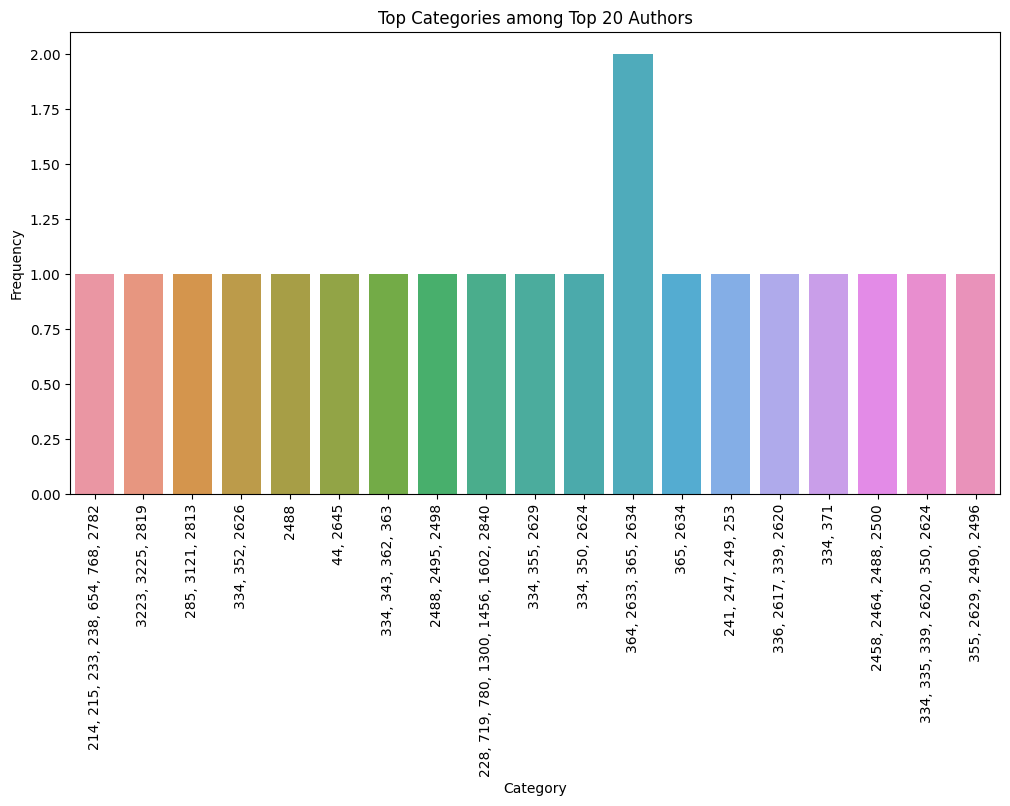

In [84]:

# Assuming 'categories' contains category information
plt.figure(figsize=(12, 6))
sns.countplot(data=top_20_authors, x='categories')
plt.title("Top Categories among Top 20 Authors")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

#df having 2 Authors


In [ ]:
#author_2 = merged_df[merged_df['authors'].str.count(',') == 1]

In [ ]:
#author_2.head()

In [ ]:
#author_2

In [ ]:
#merged_df.head(3)

In [ ]:
# merged_df['authors'].dtypes

In [ ]:
# # Dropping these columns, as they all only the null values present

# author_1 = author_1.drop(columns=['index-date', 'publication-place'])

#ydata-profiling

In [ ]:
#! pip install ydata-profiling

In [ ]:

# import pandas as pd
# from ydata_profiling import ProfileReport

# # df = pd.read_csv('/content/drive/MyDrive/dataset.csv')
# profile = ProfileReport(author_1, title="Profiling Report")

In [ ]:
#ProfileReport(author_1, title='Pandas Profiling report of "dataset"', html={'style': {'full_width':True}})